# Intro to NLP Basics with SpaCy :)
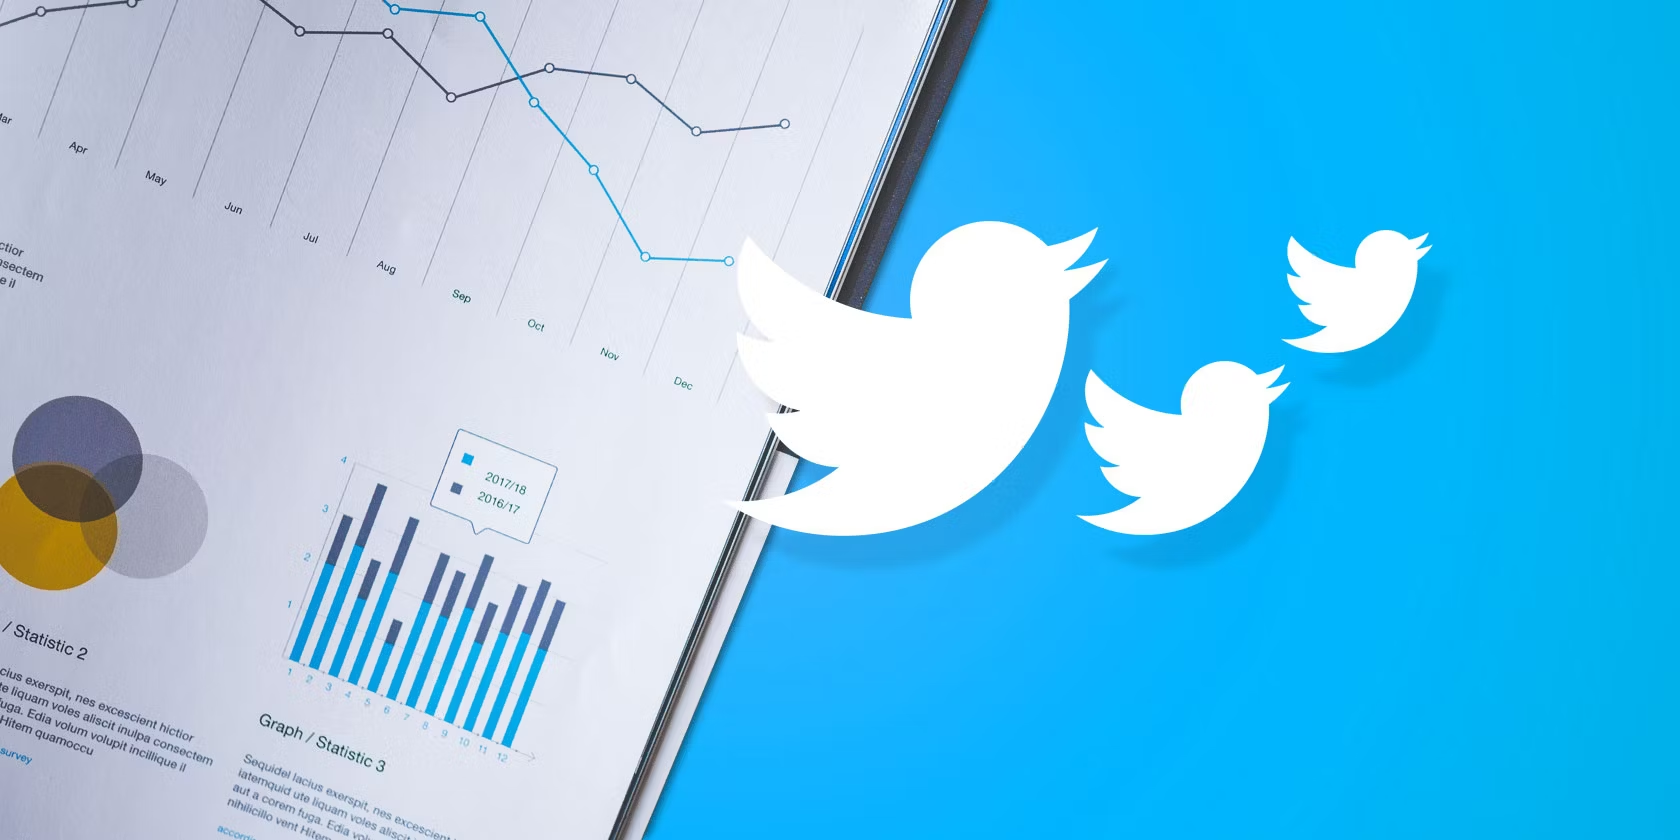

In [2]:
pip install twython


  Obtaining dependency information for twython from https://files.pythonhosted.org/packages/db/08/9921df4cb5829858dbd580ebd8a5a4b9e75a0b8295bc1e98963a983a0621/twython-3.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for requests-oauthlib>=0.4.0 from https://files.pythonhosted.org/packages/3b/5d/63d4ae3b9daea098d5d6f5da83984853c1bbacd5dc826764b249fe119d24/requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for oauthlib>=3.0.0 from https://files.pythonhosted.org/packages/7e/80/cab10959dc1faead58dc8384a781dfbf93cb4d33d50988f7a69f1b7c9bbe/oauthlib-3.2.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
   ------------------------------------- -- 143.4/151.7 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 151.7/151.7 kB 2.3 MB/s eta 0:00:00


In [3]:
from twython import Twython
import pandas as pd

APP_KEY = 'YOUR_APP_KEY'
APP_SECRET = 'YOUR_APP_SECRET'
OAUTH_TOKEN = 'YOUR_OAUTH_TOKEN'
OAUTH_TOKEN_SECRET = 'YOUR_OAUTH_SECRET'

twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
justdoit_replies = []

for i in range(51):
    try:
        temp = twitter.search(q='#justdoit -filter:retweets',
                              lang='en',
                              result_type='recent',
                              count=100,
                              trim_user=False,
                              include_entities=True,
                              max_id=None if i == 0 else [x['id'] for x in justdoit_replies[-1]['statuses']][-1] - 1,
                              tweet_mode='extended')
        justdoit_replies.append(temp)
    except Exception as e:
        print(e)
        break
        
tweets_users_df = pd.DataFrame()
for tweets in justdoit_replies:
    tweets_temp = pd.DataFrame(tweets['statuses'])
    tweets_temp.columns = ['tweet_' + t for t in tweets_temp.columns]
    users_temp = pd.DataFrame([x['user'] for x in tweets['statuses']])
    users_temp.columns = ['user_' + u for u in users_temp.columns] 

    tweets_users_temp = pd.concat([tweets_temp,users_temp], axis=1)
    tweets_users_df = tweets_users_df.append(tweets_users_temp)

all([tweet_id == user_id for tweet_id, user_id in 
     zip([x['id'] for x in tweets_users_df['tweet_user']],tweets_users_df['user_id'])])

tweets_users_df.to_csv('justdoit_tweets_2018_09_07.csv', index=False)

Twitter API returned a 401 (Unauthorized), Invalid or expired token.


KeyError: 'tweet_user'

In [6]:
import pandas as pd
import spacy
import random
from collections import Counter
import seaborn as sns

As we have seen above, spaCy comes with Pre-trained Language models and since our tweets are predominantly English, let us load our en model using the following code: 

####  Loading Spacy English Model


In [8]:
nlp = spacy.load("en")

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models and if you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [9]:
nlp = spacy.load("en_core_web_sm")


Please note that you can download other language models by running a code like below in your shell or terminal

python -m spacy download en_core_web_sm

and then loading using spacy.load(). The last argument in the above code is the name of the langauge model that's to be downloaded.

Now that our model is successfully loaded into nlp, let us read our input data using read_csv() of pandas.

#### Reading input file - Tweets

In [16]:
tweets=pd.read_csv(r'C:\Users\Neha\Downloads\NARESH IT DATA SCIENCE\APRIL\1- 13 APRIL\10 APR\justdoit_tweets_2018_09_07_2.csv')

In [18]:
tweets.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. — Sheryl Sandberg...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ Lucas Bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,333333,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"One Hand, One Dream: The Shaquem Griffin Story...",NaN,...,1A1E1A,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False


As with any dataset, let us do a few basics like understanding the shape (dimension) of the dataset and then see a sample row.

#### Dimension of the input file 

In [19]:
tweets.shape

(5089, 72)

 Now that we know tweet_full_text is the column name in which tweets are stored, let us print some sample tweets.

#### Sample Tweets Text
For simplicity, Let us take a sample of tweets. 

In [20]:
random.seed(888)

In [23]:
text= tweets.tweet_full_text[random.sample(range(1,100),20)]

In [24]:
text

23    My kinda Lady ... #Justdoit #Nike !!! https://...
91    No one is safe @kobebryant 😂😂 #JustDoIt https:...
51    If you don’t express to me that you wish to be...
92    @realDonaldTrump NIKE WAS PISSING YOU OFF.... ...
49    New season of #ESG Notes kicks off today. Toda...
97    @nikestore love my nikes\n#JUSTDOIT https://t....
82    Stand for something. Even if it means sacrifas...
56    This is why Colin kneels.  We all should kneel...
35    @tgirlmiller @realDonaldTrump Donating my #Nik...
70    @JWKeady @Kaepernick7 @KillerMike @tmorello #N...
2     There are some AMAZINGLY hilarious Nike Ad mem...
75    @Nike is aligning itself with the core values ...
68    | Just Do It!✔️ - @nike |\n#JustDoIt #Nike #Me...
48    If you work hard, limitless and focus on your ...
31    Why yall do Tayson like dat #JustDoIt #nike #p...
41    #BOOM #MannCup2018 READY!! 7 hours @satolax22 ...
34    The @elonmusk Mindset\n\n#JustDoIt https://t.c...
29    Don't skip leg day y'all #legday #justdoit

#### Annotation:
Let us begin our NLP journey with Lingustic Annotation, which means marking each and every word with its linguistic type like if it's a NOUN, VERB and so on. This help us in giving grammatical labels to our Text Corpus. The function nlp() takes only string so let us use str() to combine all our rows above into one long string.

In [27]:
text_combined = str(text)

In [28]:
doc = nlp(text_combined)

#### Tokenization¶
doc is the annotated text (that we did using the loaded langauge model). Now, let us tokenize our text. Tokenization has been done along with the above process. We can now print the chunks. The tokenized parts are called **chunks**. As a naive description, tokenization is nothing but breaking the long sentences/text corpus into a small chunks (or mostly words).😂

In [29]:
for token in doc:
    print(token)

23
   
My
kinda
Lady
...
#
Justdoit
#
Nike
!
!
!
https://
...


91
   
No
one
is
safe
@kobebryant
😂
😂
#
JustDoIt
https
:
...


51
   
If
you
do
n’t
express
to
me
that
you
wish
to
be
...


92
   
@realDonaldTrump
NIKE
WAS
PISSING
YOU
OFF
....
...


49
   
New
season
of
#
ESG
Notes
kicks
off
today
.
Toda
...


97
   
@nikestore
love
my
nikes\n#JUSTDOIT
https://t
....


82
   
Stand
for
something
.
Even
if
it
means
sacrifas
...


56
   
This
is
why
Colin
kneels
.
 
We
all
should
kneel
...


35
   
@tgirlmiller
@realDonaldTrump
Donating
my
#
Nik
...


70
   
@JWKeady
@Kaepernick7
@KillerMike
@tmorello
#
N
...


2
    
There
are
some
AMAZINGLY
hilarious
Nike
Ad
mem
...


75
   
@Nike
is
aligning
itself
with
the
core
values
...


68
   
|
Just
Do
It!
✔
️
-
@nike
|\n#JustDoIt
#
Nike
#
Me
...


48
   
If
you
work
hard
,
limitless
and
focus
on
your
...


31
   
Why
y
all
do
Tayson
like
dat
#
JustDoIt
#
nike
#
p
...


41
   
#
BOOM
#
MannCup2018
READY
!
!
7
hours
@satolax22
...


34
   
The
@elo

In [31]:
for token in doc:
    print(token.text, token.pos_)

23 NUM
    SPACE
My PRON
kinda NOUN
Lady PROPN
... PUNCT
# SYM
Justdoit PROPN
# SYM
Nike ADV
! PUNCT
! PUNCT
! PUNCT
https:// ADJ
... PUNCT

 SPACE
91 NUM
    SPACE
No DET
one NOUN
is AUX
safe ADJ
@kobebryant NOUN
😂 ADP
😂 NUM
# SYM
JustDoIt NUM
https NOUN
: PUNCT
... PUNCT

 SPACE
51 NUM
    SPACE
If SCONJ
you PRON
do AUX
n’t PART
express VERB
to ADP
me PRON
that SCONJ
you PRON
wish VERB
to PART
be AUX
... PUNCT

 SPACE
92 NUM
    SPACE
@realDonaldTrump NOUN
NIKE PROPN
WAS AUX
PISSING VERB
YOU PRON
OFF PROPN
.... PUNCT
... PUNCT

 SPACE
49 NUM
    SPACE
New ADJ
season NOUN
of ADP
# SYM
ESG PROPN
Notes NOUN
kicks VERB
off ADP
today NOUN
. PUNCT
Toda PROPN
... PUNCT

 SPACE
97 NUM
    SPACE
@nikestore PROPN
love VERB
my PRON
nikes\n#JUSTDOIT PROPN
https://t PROPN
.... PUNCT

 SPACE
82 NUM
    SPACE
Stand VERB
for ADP
something PRON
. PUNCT
Even ADV
if SCONJ
it PRON
means VERB
sacrifas NOUN
... PUNCT

 SPACE
56 NUM
    SPACE
This PRON
is AUX
why SCONJ
Colin PROPN
kneels NOUN
. PUNCT
  SPA

That's good, We've got a bunch of chunks and their respective POS tags. Perhaps, we don't want to see everything but just NOUNs. Below is the code how we can print only the nouns in the text.

In [33]:
nouns = list(doc.noun_chunks)
nouns

[23    My kinda Lady ... #Justdoit,
 No one,
 safe @kobebryant,
 😂 #JustDoIt https,
 you,
 me,
 you,
 92    @realDonaldTrump NIKE,
 YOU,
 OFF,
 49    New season,
 #ESG Notes,
 Toda,
 97    @nikestore,
 my nikes\n#JUSTDOIT https://t,
 something,
 it,
 sacrifas,
 This,
 We,
 all,
 35    @tgirlmiller @realDonaldTrump,
 my #Nik,
 70    @JWKeady @Kaepernick7,
 @tmorello,
 #N,
 some AMAZINGLY hilarious Nike Ad mem,
 itself,
 the core values,
 68    |,
 It!,
 you,
 your,
 y,
 all,
 Tayson,
 dat,
 #JustDoIt,
 #p,
 BOOM #MannCup2018 READY,
 7 hours @satolax22,
 The @elonmusk Mindset\n\n#JustDoIt,
 y',
 all,
 #legday,
 a cat,
 you,
 a lion,
 your dreams,
 Name,
 tweet_full_text,
 dtype]

 Sometimes, we might need to tokenization based on sentences. Let's say we've got Chat Transcript from Customer Service and in that case we need to tokenize our transcript based on sentences.

In [34]:
list(doc.sents)

[23    My kinda Lady ... #Justdoit #Nike !!!,
 https://...
 91    ,
 No one is safe @kobebryant 😂😂 #JustDoIt https:...
 51    If you don’t express to me that you wish to be...
 92    @realDonaldTrump NIKE WAS PISSING YOU OFF.... ...,
 49    New season of #ESG Notes kicks off today.,
 Toda...
 97    @nikestore love my nikes\n#JUSTDOIT https://t....
 82    Stand for something.,
 Even if it means sacrifas...
 56    This is why Colin kneels.  ,
 We all should kneel...
 35    @tgirlmiller @realDonaldTrump,
 Donating my #Nik...
 70    @JWKeady @Kaepernick7 @KillerMike @tmorello #N...
 2     There are some AMAZINGLY hilarious Nike Ad mem...
 75    @Nike is aligning itself with the core values ...
 68    | Just Do It!✔️ - @nike |\n#JustDoIt,
 #Nike #Me...
 48    If you work hard, limitless and focus on your ...
 31    ,
 Why yall do Tayson like dat #JustDoIt #nike #p...
 41    #BOOM #MannCup2018 READY!!,
 7 hours @satolax22 ...
 34    ,
 The @elonmusk Mindset\n\n#JustDoIt https://t.c...
 29   

#### Named Entity Recognition (NER)
NER is the process of extracting Named Entities like Person, Organization, Location and other such infromation from our Text Corpus. spaCy also has an object displacy that lets us visualize our text with NER. We can display Named Entities using the following code:

In [36]:
for ent in doc.ents:
    print(ent.text, ent.label_)

23 CARDINAL
#Justdoit # MONEY
Nike ORG
91 CARDINAL
https PERSON
51 CARDINAL
92 CARDINAL
49    New season DATE
#ESG Notes MONEY
today DATE
97 CARDINAL
82 CARDINAL
56 CARDINAL
Colin kneels PERSON
35 CARDINAL
70 CARDINAL
@KillerMike ORG
2 CARDINAL
AMAZINGLY ORG
Nike Ad ORG
75 CARDINAL
68 CARDINAL
#Nike MONEY
48 CARDINAL
31 CARDINAL
Tayson ORG
#JustDoIt # MONEY
41 CARDINAL
7 hours TIME
34 CARDINAL
29 CARDINAL
justdoit GPE
# CARDINAL
15 CARDINAL
JustDoIt MONEY


**spaCy** also allows to visualize Named Entities along woith the Text Labels.



In [43]:
spacy.displacy.render(doc, style='ent', jupyter=True)

#### Lemmatization
Lemmetiztion is the process of retrieving the root word of the current word. Lemmatization is an essential process in NLP to bring different variants of a single word to one root word.

In [39]:
for token in doc:
    print(token.text, token.lemma_)

23 23
       
My my
kinda kinda
Lady Lady
... ...
# #
Justdoit Justdoit
# #
Nike nike
! !
! !
! !
https:// https://
... ...

 

91 91
       
No no
one one
is be
safe safe
@kobebryant @kobebryant
😂 😂
😂 😂
# #
JustDoIt justdoit
https https
: :
... ...

 

51 51
       
If if
you you
do do
n’t not
express express
to to
me I
that that
you you
wish wish
to to
be be
... ...

 

92 92
       
@realDonaldTrump @realdonaldtrump
NIKE NIKE
WAS be
PISSING piss
YOU you
OFF OFF
.... ....
... ...

 

49 49
       
New new
season season
of of
# #
ESG ESG
Notes note
kicks kick
off off
today today
. .
Toda Toda
... ...

 

97 97
       
@nikestore @nikestore
love love
my my
nikes\n#JUSTDOIT nikes\n#JUSTDOIT
https://t https://t
.... ....

 

82 82
       
Stand stand
for for
something something
. .
Even even
if if
it it
means mean
sacrifas sacrifas
... ...

 

56 56
       
This this
is be
why why
Colin Colin
kneels kneel
. .
   
We we
all all
should should
kneel kneel
... ...

 

35 35
       
@tgirlmil

As you can see in the above output, words like aligning and values have been converted to their root words align and value.

####  Dependency Parser Visualization

In [44]:
spacy.displacy.render(doc, style='dep', jupyter=True)

In [51]:

text= tweets.tweet_full_text[random.sample(range(1,100),1)]
text_combined = str(text)
doc = nlp(text_combined)
print('Original Sentnece==>',doc)
spacy.displacy.render(doc, style='dep', jupyter=True)

Original Sentnece==> 30    "Believe in something. Even if it means sacrif...
Name: tweet_full_text, dtype: object
